# Ch9

In [1]:
import random

import gnwrapper
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from icecream import ic
from tqdm.notebook import tqdm

import ch9

%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


## 9.1

In [2]:
env = gym.make("CartPole-v1")
state = env.reset()
agent = ch9.actor_critic.Agent()

ic(state)

action, prob = agent.get_action(state)

ic(action)
ic(prob)

# dummy weight
G = 100.0
J = G * torch.log(prob)

ic(J)

J.backward()

ic| state: array([-0.0401332 ,  0.04683496,  0.04863632, -0.04987584], dtype=float32)
ic| action: 0
ic| prob: tensor(0.5365, grad_fn=<SelectBackward0>)
ic| J: tensor(-62.2751, grad_fn=<MulBackward0>)


In [3]:
episodes = 3000
env = gym.make("CartPole-v1")
agent = ch9.policy_gradient.Agent()
reward_history = []

for i_episode in tqdm(range(1, episodes + 1)):
    state = env.reset()
    done = False
    sum_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.add(reward, prob)
        state = next_state
        sum_reward += reward

    agent.update()

    reward_history.append(sum_reward)
    if i_episode % 100 == 0:
        ic(i_episode)
        ic(sum_reward)

  0%|          | 0/3000 [00:00<?, ?it/s]

ic| i_episode: 100
ic| sum_reward: 13.0
ic| i_episode: 200
ic| sum_reward: 12.0
ic| i_episode: 300
ic| sum_reward: 39.0
ic| i_episode: 400
ic| sum_reward: 23.0
ic| i_episode: 500
ic| sum_reward: 25.0
ic| i_episode: 600
ic| sum_reward: 17.0
ic| i_episode: 700
ic| sum_reward: 19.0
ic| i_episode: 800
ic| sum_reward: 11.0
ic| i_episode: 900
ic| sum_reward: 43.0
ic| i_episode: 1000
ic| sum_reward: 21.0
ic| i_episode: 1100
ic| sum_reward: 38.0
ic| i_episode: 1200
ic| sum_reward: 21.0
ic| i_episode: 1300
ic| sum_reward: 65.0
ic| i_episode: 1400
ic| sum_reward: 25.0
ic| i_episode: 1500
ic| sum_reward: 35.0
ic| i_episode: 1600
ic| sum_reward: 37.0
ic| i_episode: 1700
ic| sum_reward: 73.0
ic| i_episode: 1800
ic| sum_reward: 75.0
ic| i_episode: 1900
ic| sum_reward: 51.0
ic| i_episode: 2000
ic| sum_reward: 49.0
ic| i_episode: 2100
ic| sum_reward: 42.0
ic| i_episode: 2200
ic| sum_reward: 48.0
ic| i_episode: 2300
ic| sum_reward: 61.0
ic| i_episode: 2400
ic| sum_reward: 37.0
ic| i_episode: 2500
ic| s

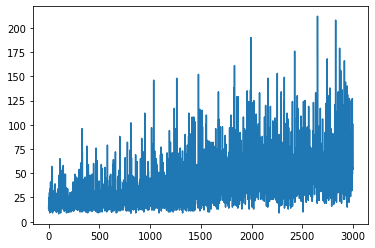

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(episodes), reward_history)
plt.show()

## 9.2

In [5]:
episodes = 3000
env = gym.make("CartPole-v1")
agent = ch9.policy_gradient.Agent(update_by_REINFORCE=True)
reward_history = []

for i_episode in tqdm(range(1, episodes + 1)):
    state = env.reset()
    done = False
    sum_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.add(reward, prob)
        state = next_state
        sum_reward += reward

    agent.update()

    reward_history.append(sum_reward)
    if i_episode % 100 == 0:
        ic(i_episode)
        ic(sum_reward)

  0%|          | 0/3000 [00:00<?, ?it/s]

ic| i_episode: 100
ic| sum_reward: 14.0
ic| i_episode: 200
ic| sum_reward: 33.0
ic| i_episode: 300
ic| sum_reward: 28.0
ic| i_episode: 400
ic| sum_reward: 29.0
ic| i_episode: 500
ic| sum_reward: 14.0
ic| i_episode: 600
ic| sum_reward: 73.0
ic| i_episode: 700
ic| sum_reward: 20.0
ic| i_episode: 800
ic| sum_reward: 95.0
ic| i_episode: 900
ic| sum_reward: 50.0
ic| i_episode: 1000
ic| sum_reward: 109.0
ic| i_episode: 1100
ic| sum_reward: 310.0
ic| i_episode: 1200
ic| sum_reward: 48.0
ic| i_episode: 1300
ic| sum_reward: 204.0
ic| i_episode: 1400
ic| sum_reward: 500.0
ic| i_episode: 1500
ic| sum_reward: 488.0
ic| i_episode: 1600
ic| sum_reward: 308.0
ic| i_episode: 1700
ic| sum_reward: 270.0
ic| i_episode: 1800
ic| sum_reward: 285.0
ic| i_episode: 1900
ic| sum_reward: 342.0
ic| i_episode: 2000
ic| sum_reward: 281.0
ic| i_episode: 2100
ic| sum_reward: 500.0
ic| i_episode: 2200
ic| sum_reward: 297.0
ic| i_episode: 2300
ic| sum_reward: 413.0
ic| i_episode: 2400
ic| sum_reward: 277.0
ic| i_episo

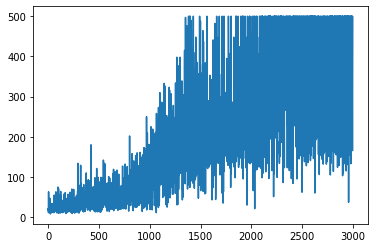

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(episodes), reward_history)
plt.show()

# 9.4

In [7]:
episodes = 2000
env = gym.make("CartPole-v1")
agent = ch9.actor_critic.Agent()
reward_history = []

for i_episode in tqdm(range(1, episodes + 1)):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.update(state, prob, reward, next_state, done)

        state = next_state
        total_reward += reward

    reward_history.append(total_reward)
    if i_episode % 100 == 0:
        ic(i_episode)
        ic(total_reward)

  0%|          | 0/2000 [00:00<?, ?it/s]

ic| i_episode: 100
ic| total_reward: 92.0
ic| i_episode: 200
ic| total_reward: 126.0
ic| i_episode: 300
ic| total_reward: 298.0
ic| i_episode: 400
ic| total_reward: 208.0
ic| i_episode: 500
ic| total_reward: 118.0
ic| i_episode: 600
ic| total_reward: 201.0
ic| i_episode: 700
ic| total_reward: 154.0
ic| i_episode: 800
ic| total_reward: 114.0
ic| i_episode: 900
ic| total_reward: 94.0
ic| i_episode: 1000
ic| total_reward: 215.0
ic| i_episode: 1100
ic| total_reward: 125.0
ic| i_episode: 1200
ic| total_reward: 282.0
ic| i_episode: 1300
ic| total_reward: 160.0
ic| i_episode: 1400
ic| total_reward: 141.0
ic| i_episode: 1500
ic| total_reward: 198.0
ic| i_episode: 1600
ic| total_reward: 234.0
ic| i_episode: 1700
ic| total_reward: 202.0
ic| i_episode: 1800
ic| total_reward: 307.0
ic| i_episode: 1900
ic| total_reward: 155.0
ic| i_episode: 2000
ic| total_reward: 138.0


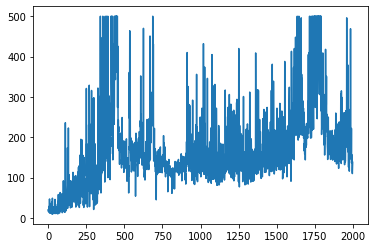

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(episodes), reward_history)
plt.show()